In [1]:
using RigidBodyDynamics
using Plots
using MeshCatMechanisms
using Base.Test

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/5124d82d2feda6989faf1931e10554a7086f3525-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/5124d82d2feda6989faf1931e10554a7086f3525-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

INFO: Loading HttpServer methods...


In [2]:
urdf = "shtuff\\doublependulum.urdf"

"shtuff\\doublependulum.urdf"

In [3]:
doublependulum = parse_urdf(Float64, urdf)

Spanning tree:
Vertex: world (root)
  Vertex: base_link, Edge: base_link_to_world
    Vertex: upper_link, Edge: shoulder
      Vertex: lower_link, Edge: elbow
No non-tree joints.

In [4]:
const state = MechanismState(doublependulum)

MechanismState{Float64, Float64, Float64, …}(…)

In [5]:
vis = MechanismVisualizer(doublependulum, URDFVisuals(urdf));

In [10]:
open(vis)

Listening on 0.0.0.0:8700...
Could not open browser automatically: could not spawn `start http://127.0.0.1:8700`: no such file or directory (ENOENT)
Please open the following URL in your browser:
http://127.0.0.1:8700


INFO: Serving MeshCat visualizer at http://127.0.0.1:8700


In [11]:
set_configuration!(state, [1.0, -1.5])
set_configuration!(vis, configuration(state))

In [16]:
ts, qs, vs = simulate(state, 5., Δt = 1e-3);

In [17]:
MeshCatMechanisms.animate(vis, ts, qs)

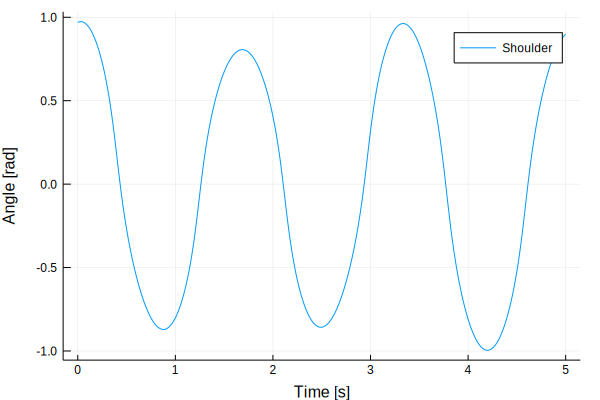

In [18]:
shoulder_angles = collect(q[1] for q in qs)
plot(ts, shoulder_angles, 
    xlabel = "Time [s]", 
    ylabel = "Angle [rad]", 
    label = "Shoulder")

In [26]:
using MeshCat, GeometryTypes, CoordinateTransformations

In [81]:
vis = Visualizer()
open(vis)

Listening on 0.0.0.0:8703...
Could not open browser automatically: could not spawn `start http://127.0.0.1:8703`: no such file or directory (ENOENT)
Please open the following URL in your browser:
http://127.0.0.1:8703


INFO: Serving MeshCat visualizer at http://127.0.0.1:8703


In [83]:
setobject!(vis[:sphere], Sphere(Point(0, 0, 0.25), 0.25))
setobject!(vis[:sphere2], Sphere(Point(0.3, 0.3, 0.25), 0.25))

MeshCat Visualizer with path /meshcat/sphere2

In [84]:
for t in 1:100
    settransform!(vis[:sphere], Translation(positions[t,:]/10))
    sleep(0.02)
end

In [77]:
positions = zeros(100, 3);

In [78]:
positions[:,1] = 0.1:0.1:10
positions[:,2] = ((0.1:0.1:10)/3).^2;